In [1]:
import bz2
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Estados iniciales

matrix_data = []
matrix_muon = []
vec_data = []
cont = 0
cont2 = 0
n = 0

In [3]:
#se trabaja el archivo comprimido en bz2

#Para python3
with bz2.open( "cpv_nogps_2019_05_18_07h00.dat.bz2", "rt" ) as bz_file:

#Para python2
#with bz2.BZ2File("cpv_nogps_2019_05_18_07h00.dat.bz2", "r") as bz_file:
    for line in bz_file: #se lee linea a linea del archivo         
        rline = line.rstrip('\n').split(' ') #se desconcatena
        cont += 1
        if cont > 49: #justo ene sa linea los datos siguen una estructura secuencial
            if rline[0] == "#":
                if len(rline) == 3: ##fin de linea de pulso
                    n = 0
                if len(rline) == 4:
                    if n == 12:
                        #print('Funciona') 
                        tmp = sum(vec_data)
                        if tmp > 50 and tmp < 70 :
                            matrix_data.append(vec_data) #se va guardando en la matriz de datos
                        elif tmp > 700 and tmp < 800 :
                            matrix_muon.append(vec_data)
                        vec_data = [] #se reinicializa el vector 
                        #break
                    else:
                        vec_data = [] # en caso de estar incompleto el vector, no se guarda
                        # pero si se inicializa                        
            else:                
                n += 1
                cont2 += 1
                vec_data.append(int(rline[0])-50)
                #if cont2 == 50:
                 #   #print(vec_data)
                  #  break
ml = np.asarray(matrix_data) #resto el valor del offset de la electrónica del detector
ml = ml 
x_num_fil, y = ml.shape
print(ml.shape)

(69362, 12)


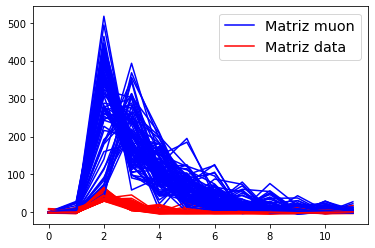

In [4]:
for i in range(100):
    plt.plot(matrix_muon[i][:],"-b")
    plt.plot(matrix_data[i][:],"-r")
    plt.legend(['Matriz muon','Matriz data'], fontsize='x-large')
plt.show()

In [5]:
print(matrix_data[0])

[0, 0, 36, 20, 11, -1, -1, 0, 0, 0, -1, 0]


In [6]:
#Condiciones iniciales

#Matriz de voltajes maximos muon
volt_max_muon = []
#Matriz de tiempo del voltaje maximo muon
time_volt_max_muon = []
#Matriz de voltajes maximos data
volt_max_data = []
#Matriz de tiempo del voltaje maximo data
time_volt_max_data = []

#Constantes de tiempo
nano_muon = 1 
nano_data = 1

In [7]:
#Se obtienen los puntos maximos de cada pulso para la matriz muon para los 100 primeros pulsos

for i in range(100):
    #El comando np.amax extrae el valor maximo de voltaje del pulso electrico
    volt_max_muon.append(np.amax(matrix_muon[i][:]))
    
    #El comando np.where extrae la posición con respecto al tiempo del pulso electrico
    posicion_time_muon = np.where(volt_max_muon[i] == matrix_muon[i][:])[0]
    #print(posicion_time_muon[0])
    
    #Opcional asignar valor de nanosegundos por posicion
    #nano_muon = 50 #nanosegundo
    time_volt_max_muon.append(posicion_time_muon[0] * nano_muon)

In [8]:
print("Los voltajes maximos son:")
print(volt_max_muon)

print("Los tiempos de los voltajes maximos son:")
print(time_volt_max_muon)

Los voltajes maximos son:
[261, 326, 402, 273, 368, 397, 347, 440, 283, 281, 464, 441, 227, 278, 359, 263, 300, 314, 373, 288, 355, 313, 281, 406, 368, 352, 352, 426, 211, 217, 250, 417, 380, 288, 393, 313, 254, 494, 414, 397, 362, 340, 355, 412, 216, 260, 394, 316, 307, 342, 345, 332, 304, 345, 428, 265, 322, 246, 273, 306, 447, 269, 427, 182, 307, 424, 394, 402, 340, 342, 410, 408, 402, 360, 364, 435, 399, 243, 281, 235, 371, 350, 406, 364, 342, 340, 397, 407, 262, 356, 260, 517, 386, 277, 249, 277, 405, 404, 412, 360]
Los tiempos de los voltajes maximos son:
[2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2]


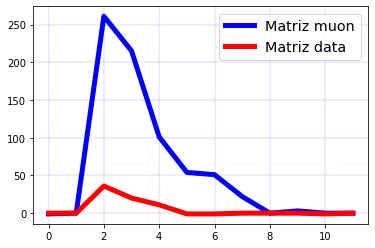

In [9]:
for i in range(0,1):
    plt.plot(matrix_muon[i][:], "-b", linewidth=5)
    plt.plot(matrix_data[i][:], "-r", linewidth=5)
    plt.legend(['Matriz muon','Matriz data'], fontsize='x-large')
    plt.grid(color='b', ls = '-.', lw = 0.2)
plt.show()

In [10]:
#Se obtienen los puntos maximos de cada pulso para la matriz data para los 100 primeros pulsos

for i in range(100):
    #El comando np.amax extrae el valor maximo de voltaje del pulso electrico
    volt_max_data.append(np.amax(matrix_data[i][:]))
    
    #El comando np.where extrae la posición con respecto al tiempo del pulso electrico
    posicion_time_data = np.where(volt_max_data[i] == matrix_data[i][:])[0]
    #print(posicion_time_data[0])
    
    #Opcional asignar valor de nanosegundos por posicion
    #nano_data = 50 #nanosegundo
    time_volt_max_data.append(posicion_time_data[0] * nano_data)

In [11]:
print("Los voltajes maximos son:")
print(volt_max_data)

print("Los tiempos de los voltajes maximos son:")
print(time_volt_max_data)

Los voltajes maximos son:
[36, 47, 62, 44, 33, 32, 39, 38, 44, 46, 49, 45, 56, 37, 37, 37, 59, 31, 33, 43, 53, 34, 57, 43, 57, 45, 31, 35, 51, 38, 47, 49, 45, 34, 55, 30, 46, 65, 41, 30, 45, 30, 46, 37, 47, 53, 36, 50, 32, 37, 35, 41, 44, 30, 34, 33, 61, 43, 47, 44, 66, 48, 47, 40, 37, 46, 39, 44, 38, 52, 37, 43, 43, 43, 37, 55, 41, 37, 46, 60, 40, 30, 45, 39, 38, 31, 42, 45, 64, 32, 34, 34, 36, 44, 30, 36, 34, 44, 42, 37]
Los tiempos de los voltajes maximos son:
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
